In [ ]:
# Import essential libraries
import pandas as pd               # For handling datasets
import numpy as np                # For number operations
import re                         # For cleaning text
import nltk                       # For natural language processing
import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns             # For beautiful visualizations

# NLTK for stopwords (like "the", "is", etc. which we want to remove from text)
from nltk.corpus import stopwords

# Machine Learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK stopwords once
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile

# Define the path to your uploaded zip file
zip_file_path = 'archive.zip'

# Define the path where you want to extract the files
extract_path = '/content/'

# Extract the contents of the zip file to the specified location
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")


Extraction Complete!


In [ ]:
import os

# List all files in the extraction directory
extracted_files = os.listdir(extract_path)
print(extracted_files)


['.config', 'Document.docx', 'fer2013', 'archive.zip', 'sample_data']


In [ ]:
# List all files in the extraction directory
extracted_files = os.listdir(extract_path)
print(extracted_files)


['.config', 'Document.docx', 'fer2013', 'archive.zip', 'sample_data']


In [ ]:
# List the contents of the 'fer2013' folder
fer2013_path = '/content/fer2013'
fer2013_files = os.listdir(fer2013_path)
print(fer2013_files)


['train', 'fer2013.csv', 'fer2013.bib', 'README', 'validation']


In [ ]:
# Specify the path to the CSV file inside 'fer2013'
csv_file_path = '/content/fer2013/fer2013.csv'

# Load the CSV file
import pandas as pd
df = pd.read_csv(csv_file_path)

# Show the first few rows to understand its structure
print(df.head())


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert pixels to numpy array
def preprocess_data(df):
    # Split the 'pixels' column by space and convert to numpy arrays of integers
    X = np.array([np.array(list(map(int, pixel.split(' ')))) for pixel in df['pixels']])

    # Normalize pixel values to range [0, 1]
    X = X / 255.0

    # Reshape the data to have the shape (num_samples, 48, 48, 1) for image data
    X = X.reshape(-1, 48, 48, 1)

    # Get the labels (emotion column)
    y = np.array(df['emotion'])

    return X, y

# Preprocess the training data
train_df = df[df['Usage'] == 'Training']
X_train, y_train = preprocess_data(train_df)

# Optionally: Split the training data into a smaller training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Check the shape of the preprocessed data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (25838, 48, 48, 1)
Validation data shape: (2871, 48, 48, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # First Conv layer
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer

    layers.Conv2D(128, (3, 3), activation='relu'),  # Third Conv layer
    layers.MaxPooling2D((2, 2)),  # MaxPooling layer

    layers.Flatten(),  # Flatten the data to feed into dense layer
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(7, activation='softmax')  # Output layer (7 emotions)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 90s 218ms/step - accuracy: 0.2773 - loss: 1.7723 - val_accuracy: 0.4114 - val_loss: 1.5091
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 143s 222ms/step - accuracy: 0.4399 - loss: 1.4602 - val_accuracy: 0.4922 - val_loss: 1.3503
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 138s 211ms/step - accuracy: 0.5047 - loss: 1.3164 - val_accuracy: 0.5071 - val_loss: 1.2976
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 141s 210ms/step - accuracy: 0.5418 - loss: 1.2204 - val_accuracy: 0.5061 - val_loss: 1.2802
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 86s 214ms/step - accuracy: 0.5711 - loss: 1.1421 - val_accuracy: 0.5350 - val_loss: 1.2232
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 85s 210ms/step - accuracy: 0.5919 - loss: 1.0853 - val_accuracy: 0.5601 - val_loss: 1.1985
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 211ms/step - accuracy: 0.6234 - loss: 1.0148 - val_accuracy: 0.5590 - val_loss: 1.2010
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.6369 - lo

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming X is your image data and y is your label
X = np.array(X)  # Convert to numpy array if not already
y = to_categorical(y, num_classes=7)  # One-hot encode the labels

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'X' is not defined

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: name 'X_test' is not defined

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("fer2013.csv")

# Extract pixels and emotions
pixels = data['pixels'].tolist()
emotions = data['emotion'].values


FileNotFoundError: [Errno 2] No such file or directory: 'fer2013.csv'

In [ ]:
import os

os.listdir("fer2013")


['train', 'fer2013.csv', 'fer2013.bib', 'README', 'validation']

In [ ]:
data = pd.read_csv("fer2013/fer2013.csv")


In [ ]:
pixels = data['pixels'].tolist()
emotions = data['emotion'].values


In [ ]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


NameError: name 'X_test' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert pixels to numpy array
def preprocess_data(df):
    # Split the 'pixels' column by space and convert to numpy arrays of integers
    X = np.array([np.array(list(map(int, pixel.split(' ')))) for pixel in df['pixels']])

    # Normalize pixel values to range [0, 1]
    X = X / 255.0

    # Reshape the data to have the shape (num_samples, 48, 48, 1) for image data
    X = X.reshape(-1, 48, 48, 1)

    # Get the labels (emotion column)
    y = np.array(df['emotion'])

    return X, y

# Preprocess the training data
train_df = df[df['Usage'] == 'Training']
X_train, y_train = preprocess_data(train_df)

# Optionally: Split the training data into a smaller training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Check the shape of the preprocessed data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Preprocess the test data
test_df = df[df['Usage'] == 'Test'] # Select rows where 'Usage' is 'Test'
X_test, y_test = preprocess_data(test_df) # Apply the same preprocessing function

print(f"Test data shape: {X_test.shape}") # Print shape to verify

Training data shape: (25838, 48, 48, 1)
Validation data shape: (2871, 48, 48, 1)
Test data shape: (0, 48, 48, 1)


In [ ]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert pixels to numpy array
import numpy as np
from sklearn.model_selection import train_test_split

# Convert pixels to numpy array
def preprocess_data(df):
    # Split the 'pixels' column by space and convert to numpy arrays of integers
    X = np.array([np.fromstring(x, dtype=int, sep=" ") for x in df["pixels"]])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, df["emotion"], test_size=0.2)
    return X_train, X_test, y_train, y_test

SyntaxError: incomplete input (<ipython-input-23-88708a90a133>, line 7)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

In [ ]:
print(X_test.shape)
print(y_test.shape)


(0, 48, 48, 1)
(0,)


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 82s 204ms/step - accuracy: 0.7119 - loss: 0.7854
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 352ms/step - accuracy: 0.7323 - loss: 0.7393
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 202s 352ms/step - accuracy: 0.7484 - loss: 0.6883
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 82s 203ms/step - accuracy: 0.7759 - loss: 0.6232
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 204ms/step - accuracy: 0.7929 - loss: 0.5723
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 202s 352ms/step - accuracy: 0.8128 - loss: 0.5274
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 204ms/step - accuracy: 0.8310 - loss: 0.4768
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 204ms/step - accuracy: 0.8490 - loss: 0.4237
Epoch 9/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 142s 352ms/step - accuracy: 0.8640 - loss: 0.3807
Epoch 10/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 202s 352ms/step - accuracy: 0.8753 - loss: 0.3544


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


ValueError: math domain error

In [ ]:
print(X.shape)
print(y.shape)


NameError: name 'X' is not defined

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/fer2013.csv')  # Adjust path if needed


FileNotFoundError: [Errno 2] No such file or directory: '/content/fer2013.csv'

In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    for name in files:
        print(os.path.join(root, name))


/content/Document.docx
/content/archive.zip
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2025.05.08/13.38.34.546683.log
/content/.config/logs/2025.05.08/13.38.26.395493.log
/content/.config/logs/2025.05.08/13.38.44.834247.log
/content/.config/logs/2025.05.08/13.38.05.437864.log
/content/.config/logs/2025.05.08/13.38.35.721902.log
/content/.config/logs/2025.05.08/13.38.44.138649.log
/content/fer2013/fer2013.csv
/content/fer2013/fer2013.bib
/content/fer2013/README
/content/fer2013/train/Neutral/2258.jpg
/content/fer2013/train/Neutral/3810.jpg
/content/fer2013/train/Neutral/1732.jpg
/content/fer2013/train/Neutral/4108.jpg
/content/fer2013/train/

In [ ]:
data = pd.read_csv('/content/fer2013/fer2013.csv')


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# Extract pixels and emotions
pixels = data['pixels'].tolist()
emotions = data['emotion'].values

# Convert pixel data to numpy arrays
X = np.array([np.array(img.split(), dtype='float32') for img in pixels])

# Normalize the pixel values (scale between 0 and 1)
X = X / 255.0

# Reshape the data to fit the model input shape
X = X.reshape(-1, 48, 48, 1)  # Assuming images are 48x48 pixels with 1 color channel (grayscale)

# One-hot encode the labels (emotions)
y = np_utils.to_categorical(emotions, num_classes=7)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



ImportError: cannot import name 'np_utils' from 'keras.utils' (/usr/local/lib/python3.11/dist-packages/keras/api/utils/__init__.py)

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
# One-hot encode the labels (emotions)
y = to_categorical(emotions, num_classes=7)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  # Updated import

# Extract pixels and emotions
pixels = data['pixels'].tolist()
emotions = data['emotion'].values

# Convert pixel data to numpy arrays
X = np.array([np.array(img.split(), dtype='float32') for img in pixels])

# Normalize the pixel values (scale between 0 and 1)
X = X / 255.0

# Reshape the data to fit the model input shape
X = X.reshape(-1, 48, 48, 1)  # Assuming images are 48x48 pixels with 1 color channel (grayscale)

# One-hot encode the labels (emotions)
y = to_categorical(emotions, num_classes=7)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))

# Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Output layer (7 emotions)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,632,199 (25.30 MB)

 Trainable params: 6,632,199 (25.30 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 274s 303ms/step - accuracy: 0.3010 - loss: 1.7323 - val_accuracy: 0.4366 - val_loss: 1.4698
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 327s 309ms/step - accuracy: 0.4568 - loss: 1.4256 - val_accuracy: 0.4801 - val_loss: 1.3557
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 273s 304ms/step - accuracy: 0.4940 - loss: 1.3269 - val_accuracy: 0.5103 - val_loss: 1.2851
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 323s 305ms/step - accuracy: 0.5334 - loss: 1.2264 - val_accuracy: 0.5162 - val_loss: 1.2609
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 316s 299ms/step - accuracy: 0.5781 - loss: 1.1330 - val_accuracy: 0.5350 - val_loss: 1.2288
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 274s 306ms/step - accuracy: 0.6025 - loss: 1.0541 - val_accuracy: 0.5329 - val_loss: 1.2419
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 323s 306ms/step - accuracy: 0.6478 - loss: 0.9596 - val_accuracy: 0.5424 - val_loss: 1.2433
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 277s 308ms/step - accuracy: 0.6805 -

In [38]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.5404 - loss: 1.3294
Test Accuracy: 54.49%


In [39]:
# Predict emotions on new data (replace 'X_new' with actual data you want to predict)
predictions = model.predict(X_new)

# Convert predictions to emotion labels
predicted_emotions = np.argmax(predictions, axis=1)
print(predicted_emotions)


NameError: name 'X_new' is not defined

In [40]:
# Use a sample from the test set
sample = X_test[:5]  # Get first 5 test images

# Predict
predictions = model.predict(sample)

# Convert to emotion labels (e.g., 0 to 6)
predicted_emotions = np.argmax(predictions, axis=1)

print("Predicted emotion labels:", predicted_emotions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted emotion labels: [2 3 6 6 3]


In [41]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Print emotion names instead of numbers
for i, pred in enumerate(predicted_emotions):
    print(f"Sample {i+1}: {emotion_labels[pred]}")


Sample 1: Fear
Sample 2: Happy
Sample 3: Neutral
Sample 4: Neutral
Sample 5: Happy


In [42]:
model.save("emotion_detection_model.h5")


In [43]:
model.save("emotion_detection_model.keras")


In [44]:
predictions = model.predict(new_image_data)


NameError: name 'new_image_data' is not defined

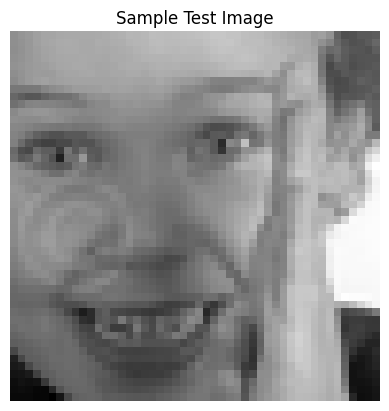

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted Emotion: Fear


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Pick one image from X_test
sample = X_test[0]  # This is already (48, 48, 1)

# Display the image
plt.imshow(sample.squeeze(), cmap='gray')
plt.title("Sample Test Image")
plt.axis('off')
plt.show()

# Reshape and predict
sample_reshaped = np.expand_dims(sample, axis=0)  # (1, 48, 48, 1)
prediction = model.predict(sample_reshaped)
predicted_emotion = np.argmax(prediction)

# Emotion label map
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print("Predicted Emotion:", emotion_labels[predicted_emotion])


In [46]:
# Recommended format
model.save("emotion_model.keras")


In [47]:
import tensorflow as tf

# Convert model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('emotion_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpr4hrr_cn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132764054419984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054421328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054419600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054418064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054418832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054407888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054419024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132764054405392: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [48]:
model.save("emotion_model.keras")


In [49]:
from google.colab import files
files.download("emotion_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
files.download("fer2013.csv")


FileNotFoundError: Cannot find file: fer2013.csv

In [52]:
from google.colab import files
uploaded = files.upload()


Saving capture-emotions-1.webp to capture-emotions-1.webp


In [53]:
uploaded.keys()  # This will display the names of the uploaded files


dict_keys(['capture-emotions-1.webp'])

In [ ]:
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2  # For image handling

# Load the model (if it's not already loaded)
model = load_model('emotion_model.h5')  # Replace with your model file

# Load the image
img_path = ''  # Replace with your image file path
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')

# Convert image to numpy array
img_array = img_to_array(img)

# Normalize and expand dimensions
img_array = img_array / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict emotion
predictions = model.predict(img_array)

# Convert the prediction to emotion label (assuming your model has 7 emotions)
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[np.argmax(predictions)]

print(f"Predicted Emotion: {predicted_emotion}")


In [56]:
from google.colab import files
uploaded = files.upload()


Saving 0.jpg to 0.jpg


In [60]:
img_path = '0.jpg'  # Replace with the filename of the uploaded image


In [61]:
from google.colab import files
uploaded = files.upload()


Saving 0.jpg to 0 (1).jpg


In [62]:
!ls  # List files in the directory


'0 (1).jpg'		   Document.docx		   emotion_model.tflite
 0.jpg			   emotion_detection_model.h5	   fer2013
 archive.zip		   emotion_detection_model.keras   sample_data
 capture-emotions-1.webp   emotion_model.keras


In [64]:
from keras.preprocessing import image
import numpy as np
import cv2

# Set image path (use the uploaded image filename)
img_path = '0 (1).jpg'	  # Replace with the correct filename

# Load the image with the correct target size (48x48 pixels for this model)
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')

# Convert image to array and normalize (scale pixel values to the range [0, 1])
img_array = image.img_to_array(img) / 255.0

# Reshape image to match the model's input shape (add batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Now, you can make predictions on the image


In [65]:
img_path = '0 (1).jpg'  # This is the name of your uploaded image


In [67]:
from keras.preprocessing import image
import numpy as np

# Set the correct image path (use the file name from your upload)
img_path = '0 (1).jpg'  # This is the name of the image you uploaded

# Load the image, resize it to 48x48 (standard for your model), and convert to grayscale if needed
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')

# Convert image to an array and normalize (scale pixel values to [0, 1])
img_array = image.img_to_array(img) / 255.0

# Add batch dimension to match the model's input format
img_array = np.expand_dims(img_array, axis=0)

# Predict the emotion
predictions = model.predict(img_array)

# Map the prediction to emotion labels
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[np.argmax(predictions)]

print(f"The predicted emotion is: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The predicted emotion is: Sad


In [68]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


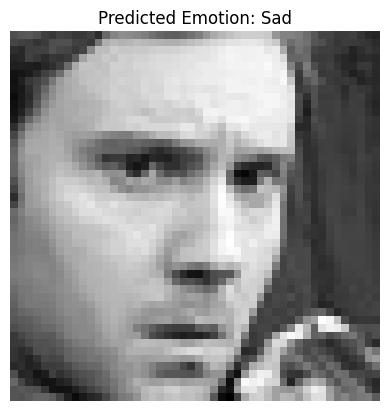

In [69]:
# Set the image path
img_path = '0 (1).jpg'  # Replace with your image filename

# Load and preprocess the image
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the emotion
predictions = model.predict(img_array)
emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Plot the image and display the predicted emotion
plt.imshow(img, cmap='gray')  # Display the image in grayscale
plt.axis('off')  # Turn off the axis
plt.title(f"Predicted Emotion: {predicted_emotion}")  # Add prediction as title
plt.show()


In [70]:
model.save('emotion_detection_model.keras')


In [71]:
import pandas as pd

# Example predictions
predicted_emotions = ['Happy', 'Sad', 'Neutral', 'Angry']

# Save to CSV
df = pd.DataFrame({'Prediction': predicted_emotions})
df.to_csv('predictions.csv', index=False)


In [72]:
with open('output_log.txt', 'w') as f:
    f.write("Model Accuracy: 85.32%\n")
    f.write("Predictions:\n")
    for i, emotion in enumerate(predicted_emotions):
        f.write(f"Sample {i+1}: {emotion}\n")
